# euro.py

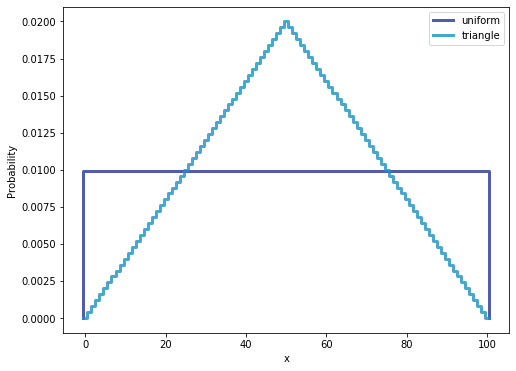

0.02097652612954468
MLE 56
Mean 55.952380952380956
Median 56
5th %ile 51
95th %ile 61
CI (51, 61)
0.02384753721469363
MLE 56
Mean 55.74349943859506
Median 56
5th %ile 51
95th %ile 61
CI (51, 61)


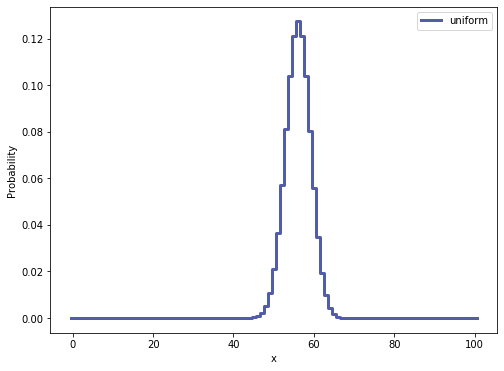

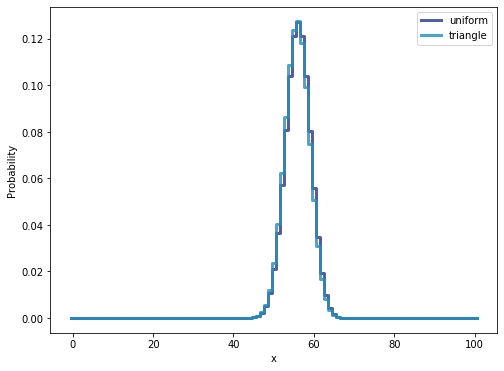

<Figure size 576x432 with 0 Axes>

In [5]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""
import sys
sys.path.append("../code/")

import thinkbayes
import thinkplot


class Euro(thinkbayes.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x


class Euro2(thinkbayes.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def UniformPrior():
    """Makes a Suite with a uniform prior."""
    suite = Euro(range(0, 101))
    return suite


def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite


def RunUpdate(suite, heads=140, tails=110):
    """Updates the Suite with the given number of heads and tails.

    suite: Suite object
    heads: int
    tails: int
    """
    dataset = 'H' * heads + 'T' * tails

    for data in dataset:
        suite.Update(data)


def Summarize(suite):
    """Prints summary statistics for the suite."""
    print(suite.Prob(50))

    print('MLE', suite.MaximumLikelihood())

    print('Mean', suite.Mean())
    print('Median', thinkbayes.Percentile(suite, 50))

    print('5th %ile', thinkbayes.Percentile(suite, 5))
    print('95th %ile', thinkbayes.Percentile(suite, 95))

    print('CI', thinkbayes.CredibleInterval(suite, 90))


def PlotSuites(suites, root):
    """Plots two suites.

    suite1, suite2: Suite objects
    root: string filename to write
    """
    thinkplot.Clf()
    thinkplot.PrePlot(len(suites))
    thinkplot.Pmfs(suites)

    thinkplot.Show(xlabel='x',
                   ylabel='Probability')
    
#     thinkplot.Save(root=root,
#                    xlabel='x',
#                    ylabel='Probability',
#                    formats=['pdf', 'eps'])


def main():
    # make the priors
    suite1 = UniformPrior()
    suite1.name = 'uniform'

    suite2 = TrianglePrior()
    suite2.name = 'triangle'

    # plot the priors
    PlotSuites([suite1, suite2], 'euro2')

    # update
    RunUpdate(suite1)
    Summarize(suite1)

    RunUpdate(suite2)
    Summarize(suite2)

    # plot the posteriors
    PlotSuites([suite1], 'euro1')
    PlotSuites([suite1, suite2], 'euro3')


if __name__ == '__main__':
    main()

# euro2.py

No handles with labels found to put in legend.


55.95238095238096


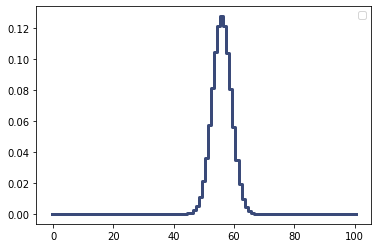

<Figure size 576x432 with 0 Axes>

In [6]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""

import sys
sys.path.append("../code/")

import thinkbayes
import thinkplot


class Euro(thinkbayes.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x


class Euro2(thinkbayes.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def Version1():
    suite = Euro(range(0, 101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails

    for data in dataset:
        suite.Update(data)

    return suite


def Version2():
    suite = Euro(range(0, 101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails

    suite.UpdateSet(dataset)
    return suite


def Version3():
    suite = Euro2(range(0, 101))
    heads, tails = 140, 110

    suite.Update((heads, tails))
    return suite


def main():

    suite = Version3()
    print(suite.Mean())

    thinkplot.Pmf(suite)
    thinkplot.Show()
    


if __name__ == '__main__':
    main()


# euro3.py

In [2]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""

import sys
sys.path.append("../code/")

import thinkbayes


class Euro(thinkbayes.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite


def SuiteLikelihood(suite, data):
    """Computes the weighted average of likelihoods for sub-hypotheses.

    suite: Suite that maps sub-hypotheses to probability
    data: some representation of the data
   
    returns: float likelihood
    """
    total = 0
    for hypo, prob in suite.Items():
        like = suite.Likelihood(data, hypo)
        total += prob * like
    return total


def Main():
    data = 140, 110
    data = 8, 12

    suite = Euro()
    like_f = suite.Likelihood(data, 50)
    print('p(D|F)', like_f)

    actual_percent = 100.0 * 140 / 250
    likelihood = suite.Likelihood(data, actual_percent)
    print('p(D|B_cheat)', likelihood)
    print('p(D|B_cheat) / p(D|F)', likelihood / like_f)

    like40 = suite.Likelihood(data, 40)
    like60 = suite.Likelihood(data, 60)
    likelihood = 0.5 * like40 + 0.5 * like60
    print('p(D|B_two)', likelihood)
    print('p(D|B_two) / p(D|F)', likelihood / like_f)

    b_uniform = Euro(range(0, 101))
    b_uniform.Remove(50)
    b_uniform.Normalize()
    likelihood = SuiteLikelihood(b_uniform, data)
    print('p(D|B_uniform)', likelihood)
    print('p(D|B_uniform) / p(D|F)', likelihood / like_f)

    b_tri = TrianglePrior()
    b_tri.Remove(50)
    b_tri.Normalize()
    likelihood = b_tri.Update(data)
    print('p(D|B_tri)', likelihood)
    print('p(D|B_tri) / p(D|F)', likelihood / like_f)


if __name__ == '__main__':
    Main()

p(D|F) 9.5367431640625e-07
p(D|B_cheat) 5.092562103304117e-07
p(D|B_cheat) / p(D|F) 0.5339938400034218
p(D|B_two) 8.541844380057601e-07
p(D|B_two) / p(D|F) 0.8956773012663279
p(D|B_uniform) 3.6848221070628534e-07
p(D|B_uniform) / p(D|F) 0.38638160257355386
p(D|B_tri) 5.771013156145966e-07
p(D|B_tri) / p(D|F) 0.6051345891218912


# Using Beta prior

No handles with labels found to put in legend.


posterior mean: 0.5595238095238095


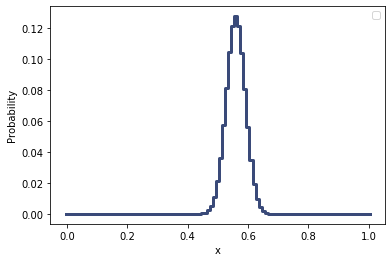

<Figure size 576x432 with 0 Axes>

In [67]:
beta=thinkbayes.Beta()
beta.Update((140,110))
print("posterior mean:",beta.Mean())
pmf=beta.MakePmf()
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel='x', ylabel='Probability')  # posterior distribution

# ex4-1
We introduce a probablity y for uncertain observation, which means the data "H" has a probability to be actually "T" and vice versa. Write a class to estimate the bias of coin and y, figure out how posterior is dependent on y.

### Wrong version
Wrong version. To make it correct, we need to modify the likelihood, not only the input data.

In [104]:
import random
import numpy as np

class Estimate():
    def __init__(self,y):
        self.y=y
    def estimate(self,data):
        heads,tails=data
        means=[]
        for i in range(100):  # simulation for 100 times
            self.beta=thinkbayes.Beta()
            x=random.random()*self.y
            self.beta.Update((heads*(1-2*x+self.y),tails*(1+2*x-self.y)))
            means.append(self.beta.Mean())
        means=np.array(means)
        print("y:{}, AVG of posterior mean:{}, STD of posterior mean:{}".format(self.y,means.mean(),means.std()))  # mean of posterior
#         pmf=self.beta.MakePmf()
#         thinkplot.Pmf(pmf)
#         thinkplot.Show(xlabel='x', ylabel='Probability')  
        
data=110,110
for y in [i*0.1 for i in range(10)]:
    est=Estimate(y)
    est.estimate(data)

y:0.0, AVG of posterior mean:0.5, STD of posterior mean:0.0
y:0.1, AVG of posterior mean:0.49984400584239014, STD of posterior mean:0.02818912548632364
y:0.2, AVG of posterior mean:0.49667448405616893, STD of posterior mean:0.058626701674245496
y:0.30000000000000004, AVG of posterior mean:0.5032819307104855, STD of posterior mean:0.08202401960908458
y:0.4, AVG of posterior mean:0.4952394123729831, STD of posterior mean:0.1121459388711772
y:0.5, AVG of posterior mean:0.4975262390891198, STD of posterior mean:0.13128702805414474
y:0.6000000000000001, AVG of posterior mean:0.49128705206241835, STD of posterior mean:0.16188635831851284
y:0.7000000000000001, AVG of posterior mean:0.4882630120795789, STD of posterior mean:0.1922097762391662
y:0.8, AVG of posterior mean:0.5206957103169071, STD of posterior mean:0.23028085926025518
y:0.9, AVG of posterior mean:0.5068036545982187, STD of posterior mean:0.27750877877992197


when y grows larger, the std of the simulation of posterior mean becomes larger, which indicates the posterior is less likely to give the correct result.

### Correct version

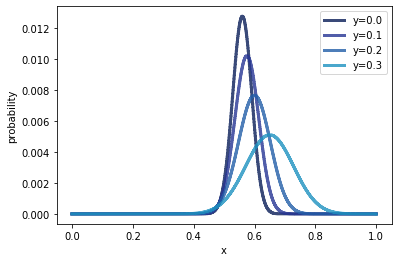

<Figure size 576x432 with 0 Axes>

In [102]:
import numpy as np
from thinkbayes import Suite
import thinkplot


class Euro(Suite):
    def __init__(self,hypos):
        Suite.__init__(self)
        for hypo in hypos:
            self.Set(hypo,1)
        self.Normalize()
        
    def Likelihood(self,data,hypo):
        x=hypo
        if data=="H":
            return x
        else:
            return 1-x
        

class EuroNew(Suite):
    def __init__(self,hypos,y):
        Suite.__init__(self)
        for hypo in hypos:
            self.Set(hypo,1)
        self.Normalize()
        self.y=y
        
    def Likelihood(self,data,hypo):
        x=hypo
        if data=="T":
            return x*self.y + (1-x)*(1-self.y)
        else:
            return (1-x)*self.y+x*(1-self.y)

# suite=Euro(range(0,101))  # the original code
suite1=Euro(np.linspace(0.0,1.0,num=1000))  # sample more hypos, make the plot smoother
suite1.name="y=0.0"
dataset="H"*140+"T"*110
for data in dataset:
    suite1.Update(data)

suites=[suite1]
for y in [0.1,0.2,0.3]:
    suite2=EuroNew(np.linspace(0.0,1.0,num=1000),y)
    suite2.name="y={}".format(y)
    dataset="H"*140+"T"*110
    for data in dataset:
        suite2.Update(data)
    suites.append(suite2)

thinkplot.Pmfs(suites)
thinkplot.Show(xlabel="x",ylabel="probability")

We can see that the CI of posterior becomes larger, the mean shifts larger.